import library from tensorflow, pandas, numpy, matplotlib

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as prediction

insert data from csv file

In [2]:
df = pd.read_csv('~/tutorialTensorFlow/model.csv')
df.shape

(873, 10)

there are 11 coloumns, 9 first coloumns as input and 2 last coloumns as output. there are 2000 rows, 1000 first row as data for learning and 1000 last row for test 

In [3]:
data = df.values
X_data = data[:,-7:]
Y_data = data[:,:-7]

X = X_data[-700:]
Y = Y_data[-700:]
X_test = X_data[:-700]
Y_test = Y_data[:-700]

show data

In [4]:
X_test.shape
#X_data[:5]

(173, 7)

In [5]:
Y_test.shape
#Y_data[:5]

(173, 3)

make a model. 9 input, 5 hidden layers with 128 node in each layer, 2 output

In [6]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(6, activation= tf.keras.activations.linear)
    ])
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate =0.001),loss='mean_squared_error',metrics=['accuracy'])

 learning process with 1000 epochs

In [70]:
model.evaluate(X_test,  Y_test, verbose=2)

173/173 - 0s - loss: 1.8051e-04 - accuracy: 0.9884


[0.0001805144105032739, 0.9884393]

In [10]:
learn = model.fit(X, Y, epochs= 100)

Epoch 1/100


TypeError: 'NoneType' object is not callable

plot error graph from learning process

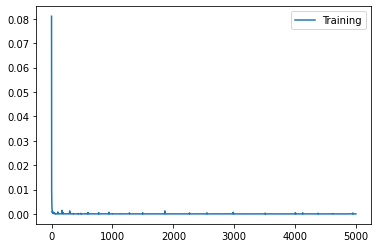

In [71]:
plt.plot(learn.history['loss'],label = 'Training')
plt.legend()
plt.show()

predict output using model

In [72]:
Y_pred = model.predict(X_test)

Plot predict result

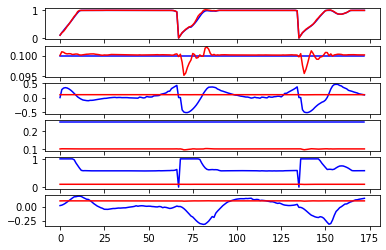

In [73]:
x_label = np.arange(0,173,1)
plt.figure()
plt.subplot(611)
plt.plot(x_label, Y_test[:,0], '-b', x_label, Y_pred[:,0], '-r')
plt.subplot(612)
plt.plot(x_label, Y_test[:,1], '-b', x_label, Y_pred[:,1], '-r')
plt.subplot(613)
plt.plot(x_label, Y_test[:,2], '-b', x_label, Y_pred[:,1], '-r')
plt.subplot(614)
plt.plot(x_label, Y_test[:,3], '-b', x_label, Y_pred[:,1], '-r')
plt.subplot(615)
plt.plot(x_label, Y_test[:,4], '-b', x_label, Y_pred[:,1], '-r')
plt.subplot(616)
plt.plot(x_label, Y_test[:,5], '-b', x_label, Y_pred[:,1], '-r')

plt.show()

summary of model

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  1024      
_________________________________________________________________
dense_13 (Dense)             multiple                  16512     
_________________________________________________________________
dense_14 (Dense)             multiple                  16512     
_________________________________________________________________
dense_15 (Dense)             multiple                  16512     
_________________________________________________________________
dense_16 (Dense)             multiple                  16512     
_________________________________________________________________
dense_17 (Dense)             multiple                  774       
Total params: 67,846
Trainable params: 67,846
Non-trainable params: 0
__________________________________________________

save your model

In [11]:
model.save_weights('./model_boat/hehe')

made a new model

In [12]:
model_new = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(2, activation= tf.keras.activations.linear)
    ])
model_new.compile(optimizer= tf.keras.optimizers.Adam(learning_rate =0.001),loss='mean_squared_error',metrics=['accuracy'])


load previous model to new model

In [13]:
model_new.load_weights('./model_boat/hehe')
loss,acc = model_new.evaluate(X,  Y, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

272/272 - 0s - loss: 459.9264 - accuracy: 0.4984
Restored model, accuracy: 49.84%
